# Business Problem

Syria Tel is a telecom company that is reaching out to us to reduce customers leaving their service for another provider (defined as churn). To do this we will analyze information and create a model that will predict if a customer is at risk of leaving, as well as try to determine what factors are causing customrs to want to leave.

In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import sys
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

In [8]:
data = pd.read_csv('Telecom.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
data['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [10]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [12]:
# Area Code should be treated as a categorical variable rather than a continuous variable
data['area code'] = data['area code'].astype('object')

In [13]:
data.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


After initial review of data, we see some good things about the data:
1. There are no missing values.
2. There do not appear to be outliers

This means that we can should not have to drop any of our data or make any guesses on what any datapoints "should" be.

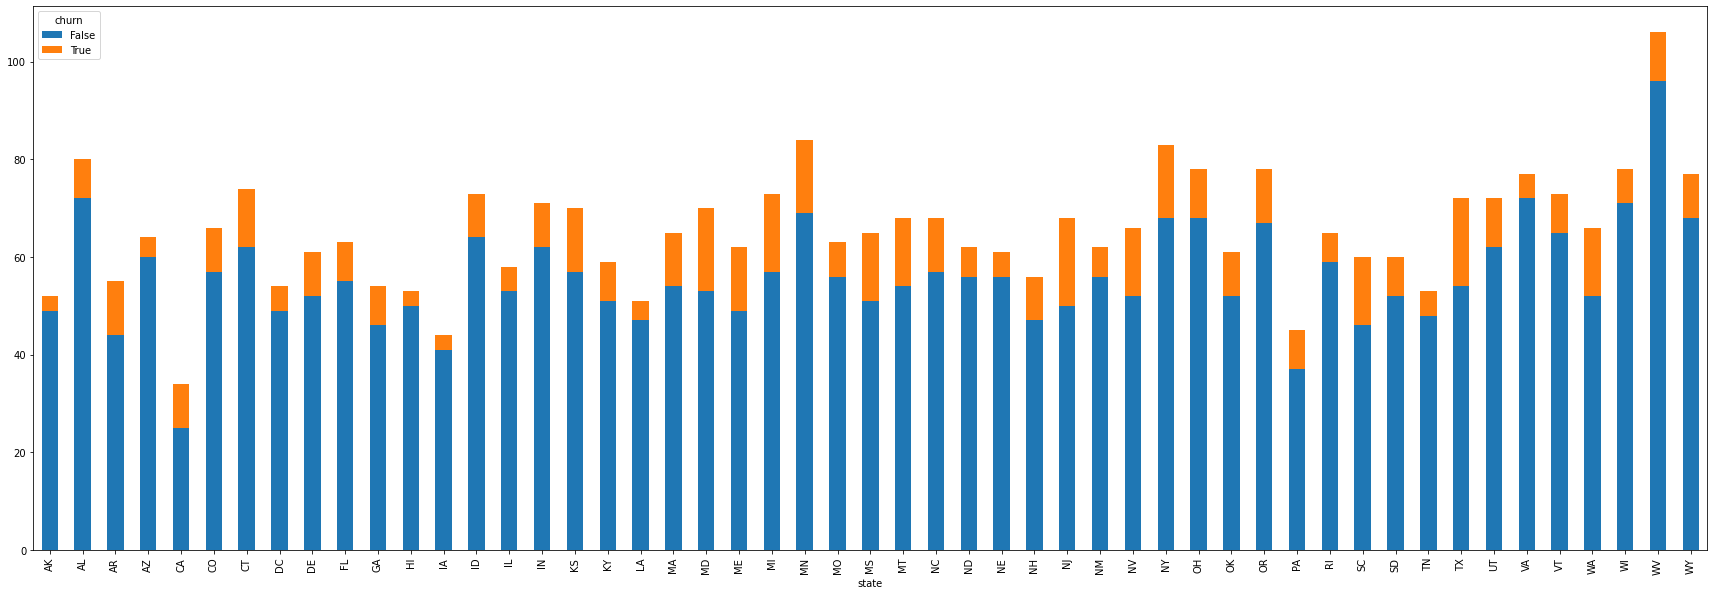

In [14]:
data.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10));

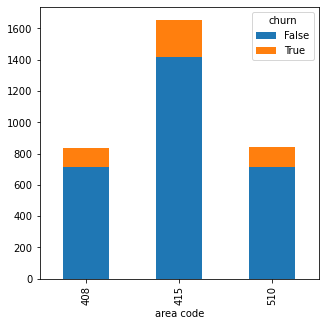

In [15]:
data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

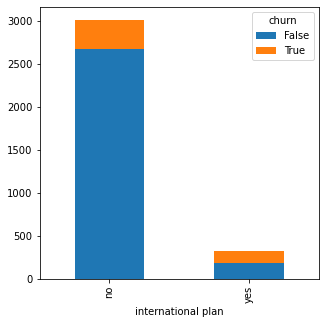

In [16]:
data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

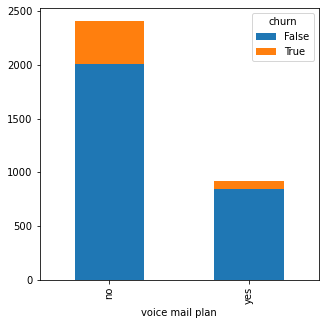

In [17]:
data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5));

Preprocessing

In [18]:
X = data.drop('churn', axis=1)
y = data['churn']

In [19]:
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns
print(cat_cols)
print(num_cols)

Index(['state', 'area code', 'phone number', 'international plan',
       'voice mail plan'],
      dtype='object')
Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')


To start, we can build a baseline model. We will take the simplest features to work with (the numeric features), feed them into a logistic regression model, and analyze to determine what improvements can be made.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [21]:
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

In [22]:
y_test.value_counts(normalize=True)

False    0.848576
True     0.151424
Name: churn, dtype: float64

In [23]:
baseline_model = LogisticRegression()

baseline_model.fit(X_train_num, y_train)

baseline_model.score(X_train_num, y_train)

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8529632408102026

This model appears to already be good, but its important to look a bit deeper.

In [24]:
y_test.value_counts(normalize=True)

False    0.848576
True     0.151424
Name: churn, dtype: float64

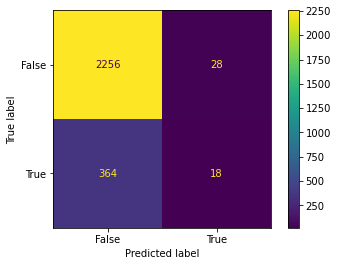

In [25]:
plot_confusion_matrix(baseline_model, X_train_num, y_train);

In [26]:
y_preds = baseline_model.predict(X_train_num)

recall_score(y_train, y_preds)

0.04712041884816754

We can see that the baseline model usually just predicts that the customer is not going to leave, and since about 85% of customers stay, the model can just always say the customer will stay and be right 85% of the time. From the confusion matrix above, we can see that our test only found 3 customers that were likely to leave, and missed 98 customers that were likely to leave. This is further supported by a low recall score.

We want our model to minimize false negatives (in this case, the model predicting that a customer will not leave when the customer will leave). While we also want to reduce false positives (predicting that a customer will leave when they are unlikely to), it is not as important since our solutions will likely be reaching out to at risk customers to ensure they are happy with our service, which should not necessarily make happy customers want to leave.

Handle Categorical Cols - Label Encode

In [27]:
X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

X_train_cat.drop('phone number', axis=1, inplace=True)
X_test_cat.drop('phone number', axis=1, inplace=True)

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat), \
                               columns=ohe.get_feature_names(X_train_cat.columns) ,index=X_train_cat.index)

X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat), \
                             columns=ohe.get_feature_names(X_test_cat.columns), index=X_test_cat.index)

In [29]:
X_train_cat_ohe

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
X_train_both = pd.concat([X_train_num, X_train_cat_ohe], axis=1)
X_test_both = pd.concat([X_test_num, X_test_cat_ohe], axis=1)

In [31]:
num_cat_model = LogisticRegression()

num_cat_model.fit(X_train_both, y_train)

num_cat_model.score(X_train_both, y_train)

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8529632408102026

In [32]:
recall_score(y_train, num_cat_model.predict(X_train_both))

0.060209424083769635

Scaling

In [33]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_both), \
                              columns=X_train_both.columns, index=X_train_both.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_both), columns=X_test_both.columns, index=X_test_both.index)


In [34]:
from sklearn.model_selection import StratifiedKFold
# Using the Strafied Cross Validation since there is a class imbalance

In [35]:
def stratified_cv(X, y, clf_class, shuffle=True, n_splits=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_splits)
    y_pred = np.array(y.copy())

    for ii,jj in stratified_k_fold.split(X, y):
        # Allows us to enter np array or dataframe/series
        np_X = np.array(X)
        np_y = np.array(y)
        
        y_train = np_y[ii]
        X_train, X_test = np_X[ii], np_X[jj]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

Accuracy scores for the basic models.

In [36]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.recall_score(y_train, stratified_cv(X_train_scaled, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.recall_score(y_train, stratified_cv(X_train_scaled, y_train, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.recall_score(y_train, stratified_cv(X_train_scaled, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.recall_score(y_train, stratified_cv(X_train_scaled, y_train, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.recall_score(y_train, stratified_cv(X_train_scaled, y_train, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.73
Support vector machine(SVM):   0.11
Random Forest Classifier:      0.61
K Nearest Neighbor Classifier: 0.06
Logistic Regression:           0.25


In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, stratified_cv(X_train_scaled, y_train, ensemble.GradientBoostingClassifier))

0.8597058068420426

In [49]:
# Create Function to try different N-Neighbors
def knclf_report(X_train, X_test, y_train, y_test, lst, model_name):
    """
    Function to fit and test KNeighborsClassifier models and store metrics for the training and 
    test sets.

    Args:
        X_train(pandas.DataFrame or pandas.Series): Contains the training set of independent variables.
        X_test(pandas.DataFrame or pandas.Series): Contains the test set of independent variables.
        y_train(pandas.DataFrame or pandas.Series): Contains the training set of the dependent variable.
        y_test(pandas.DataFrame or pandas.Series): Contains the test set of the dependent variable.
        lst(list): List to store metrics.
        model_name(str): Custom Model Name to be able to identify the model on the list.
    """
    # Loop through different Number of Neighbors (one to fourteen)
    for n in range(1, 15):

        # Create Instance of Model
        kn_cl = KNeighborsClassifier(n_neighbors=n)

        # Fit Model
        kn_cl.fit(X_train, y_train)

        # Predict
        y_hat_test = kn_cl.predict(X_test)
        y_hat_train = kn_cl.predict(X_train)

        # Confusion Matrix - Test
        conf_matrix_test = confusion_matrix(y_test, y_hat_test)
        # Extract False/True Negatives/Positives
        tn_test = conf_matrix_test[0][0]
        fp_test = conf_matrix_test[0][1]
        fn_test = conf_matrix_test[1][0]
        tp_test = conf_matrix_test[1][1]
        
        # Confusion Matrix - Train
        conf_matrix_train = confusion_matrix(y_train, y_hat_train)
        # Extract False/True Negatives/Positives
        tn_train = conf_matrix_train[0][0]
        fp_train = conf_matrix_train[0][1]
        fn_train = conf_matrix_train[1][0]
        tp_train = conf_matrix_train[1][1]

        # Calculate Metrics - Test
        ps_test = precision_score(y_test, y_hat_test)
        rs_test = recall_score(y_test, y_hat_test)
        acc_test = accuracy_score(y_test, y_hat_test)
        f1_test = f1_score(y_test, y_hat_test)
        neg_pred_test = round((fn_test / (fn_test + fp_test)), 2)
        
        # Calculate Metrics - Train
        ps_train = precision_score(y_train, y_hat_train)
        rs_train = recall_score(y_train, y_hat_train)
        acc_train = accuracy_score(y_train, y_hat_train)
        f1_train = f1_score(y_train, y_hat_train)
        neg_pred_train = round((fn_train / (fn_train + fp_train)), 2)

        # Append Results
        lst.append([n, ps_train, rs_train, acc_train, f1_train, neg_pred_train, 
                    tn_train, fn_train, fp_train, tp_train, model_name, 'train'])
        lst.append([n, ps_test, rs_test, acc_test, f1_test, neg_pred_test, 
                    tn_test, fn_test, fp_test, tp_test, model_name, 'test'])

In [51]:
def model_report(model, X_train, X_test, y_train, y_test, lst, sample_set, model_name):
    """
    Function to fit and test a Classification Model, generate metrics and store them in a list.

    Args:
        model(sklearn.model): Instance of a Classification Model.
        X_train(pandas.DataFrame or pandas.Series): Contains the training set of independent variables.
        X_test(pandas.DataFrame or pandas.Series): Contains the test set of independent variables.
        y_train(pandas.DataFrame or pandas.Series): Contains the training set of the dependent variable.
        y_test(pandas.DataFrame or pandas.Series): Contains the test set of the dependent variable.
        lst(list): List to store metrics.
        sample_set(str): Custom data set name to able to identify the model's performance.
        model_name(str): Custom Model Name to be able to identify the model on the list.
        
    Return:
        model(sklearn.model): Trained model instance
    """
    # Train Model
    model.fit(X_train, y_train)

    # Predict
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    # Confusion Matrix
    conf_matrix_train = confusion_matrix(y_train, y_hat_train)
    conf_matrix_test = confusion_matrix(y_test, y_hat_test)
    
    # True/False Positive/Negative
    tn_train = conf_matrix_train[0][0]
    fp_train = conf_matrix_train[0][1]
    fn_train = conf_matrix_train[1][0]
    tp_train = conf_matrix_train[1][1]
    tn_test = conf_matrix_test[0][0]
    fp_test = conf_matrix_test[0][1]
    fn_test = conf_matrix_test[1][0]
    tp_test = conf_matrix_test[1][1]

    # Calculate Metrics
    ps_test = round(precision_score(y_test, y_hat_test), 2)
    ps_train = round(precision_score(y_train, y_hat_train), 2)
    rs_test = round(recall_score(y_test, y_hat_test), 2)
    rs_train = round(recall_score(y_train, y_hat_train), 2)
    acc_test = round(accuracy_score(y_test, y_hat_test), 2)
    acc_train = round(accuracy_score(y_train, y_hat_train), 2)
    f1_test = round(f1_score(y_test, y_hat_test), 2)
    f1_train = round(f1_score(y_train, y_hat_train), 2)
    neg_pred_test = round((fn_test / (fn_test + fp_test)), 2)
    neg_pred_train = round((fn_train / (fn_train + fp_train)), 2)
    
    # Append Results to lst
    lst.append([ps_train, rs_train, acc_train, f1_train, neg_pred_train, 
                tn_train, fn_train, fp_train, tp_train, sample_set, model_name, 'train'])
    lst.append([ps_test, rs_test, acc_test, f1_test, neg_pred_test, 
                tn_test, fn_test, fp_test, tp_test, sample_set, model_name, 'test'])
    
    # Print Report
    print(f'Train \nPrecision: {ps_train} | Recall: {rs_train} | Accuracy: {acc_train}')
    print(f'F1-Score: {f1_train} | Neg Predictive: {neg_pred_train}')
    print('Confusion Matrix\n', conf_matrix_train)
    print('')
    print(f'Test \nPrecision: {ps_test} | Recall: {rs_test} | Accuracy: {acc_test}')
    print(f'F1-Score: {f1_test} | Neg Predictive: {neg_pred_test}')
    print('Confusion Matrix\n', conf_matrix_test)
    
    return model

# Create Empty List to Store metrics
model_results = []

In [61]:
# Create Instance of Model
knn_cl = KNeighborsClassifier(n_neighbors=5)

# Scaled Features
knn_cl.fit(X_train_scaled, y_train)

recall_score(y_train, knn_cl.predict(X_train_scaled))

0.17277486910994763

Classification Reports

In [38]:
print('Gradient Boosting Classifier:\n {}\n'.format(classification_report(y_train, stratified_cv(X_train_scaled, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(classification_report(y_train, stratified_cv(X_train_scaled, y_train, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(classification_report(y_train, stratified_cv(X_train_scaled, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(classification_report(y_train, stratified_cv(X_train_scaled, y_train, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(classification_report(y_train, stratified_cv(X_train_scaled, y_train, linear_model.LogisticRegression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97      2284
        True       0.90      0.73      0.81       382

    accuracy                           0.95      2666
   macro avg       0.93      0.86      0.89      2666
weighted avg       0.95      0.95      0.95      2666


Support vector machine(SVM):
               precision    recall  f1-score   support

       False       0.87      1.00      0.93      2284
        True       0.82      0.11      0.19       382

    accuracy                           0.87      2666
   macro avg       0.84      0.55      0.56      2666
weighted avg       0.86      0.87      0.82      2666


Random Forest Classifier:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97      2284
        True       0.97      0.59      0.73       382

    accuracy                           0.94      2666
   macro avg       0.95      0.79     

In [39]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

NameError: name 'figure' is not defined

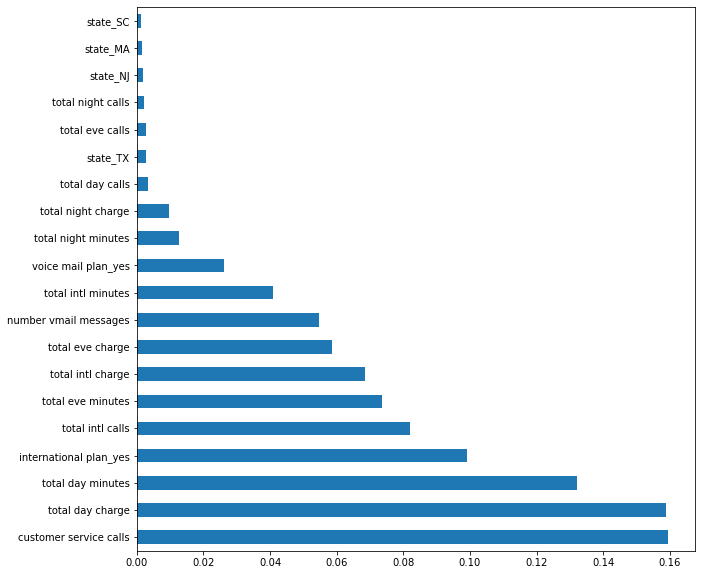

In [65]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
feat_importances = pd.Series(gbc.feature_importances_, index=X_train_scaled.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh' , figsize=(10,10))

[8.13676583e-04 5.47409737e-02 1.32082826e-01 3.27110662e-03
 1.58777928e-01 7.36149106e-02 2.74428676e-03 5.85293109e-02
 1.26615271e-02 2.19572446e-03 9.61389282e-03 4.09250418e-02
 8.20324307e-02 6.85050156e-02 1.59475096e-01 1.82193980e-04
 5.57917399e-05 7.55166342e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.73488466e-04 0.00000000e+00 0.00000000e+00
 3.09181012e-04 3.19149413e-04 8.90940912e-04 0.00000000e+00
 1.59994010e-04 4.56543902e-05 0.00000000e+00 7.08983287e-05
 0.00000000e+00 1.52709474e-03 0.00000000e+00 1.75883105e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.20720464e-04
 7.95379541e-05 5.93150880e-06 3.94299401e-04 7.18774255e-04
 0.00000000e+00 1.89542119e-03 5.61146450e-04 0.00000000e+00
 5.58397302e-06 6.54364768e-06 0.00000000e+00 4.43491040e-04
 0.00000000e+00 0.00000000e+00 1.18438500e-03 0.00000000e+00
 0.00000000e+00 2.83250979e-03 0.00000000e+00 0.00000000e+00
 2.90168292e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

<AxesSubplot:>

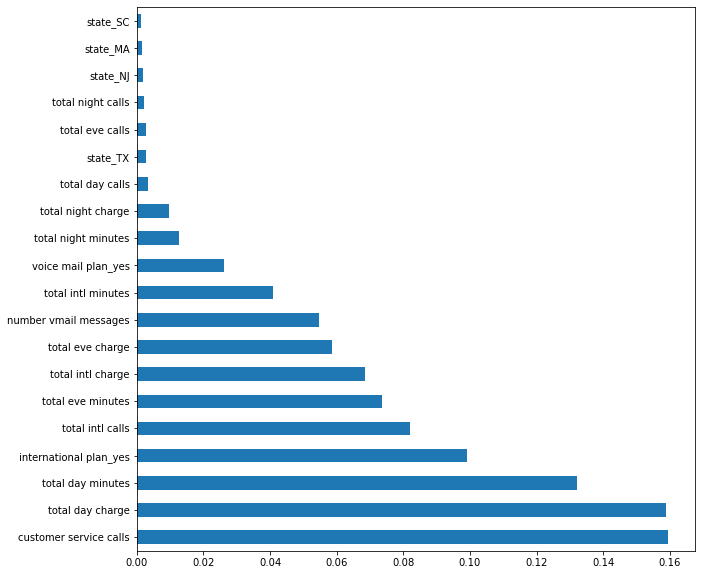

In [40]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=X_train_scaled.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

In [112]:
grid = [{'loss' : ['deviance', 'exponential'],
         'learning_rate' : [.1, .01, .001],
         'n_estimators' : [100, 1000, 10000]
}]

In [118]:
gridsearch = GridSearchCV(estimator=gbc,
                         param_grid=grid,
                         scoring='recall',
                         cv=7)

In [119]:
gridsearch.fit(X_train_scaled, y_train)

gridsearch.score(X_train_scaled, y_train)

1.0

In [120]:
gridsearch.score(X_test_scaled, y_test)

0.7722772277227723

In [121]:
gridsearch.best_params_
# {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 10000}

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 10000}

In [6]:
clf = ensemble.RandomForestClassifier()

In [41]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [46]:
clf_grid = [{
    'max_depth' : [1, 3, 5],
    'min_samples_leaf' : [1, 2, 3]
}]

In [47]:
clf_gridsearch = GridSearchCV(estimator = clf,
                             param_grid=clf_grid,
                             scoring = 'recall',
                             cv=5)

In [48]:
clf_gridsearch.fit(X_train_scaled, y_train)

clf_gridsearch.score(X_train_scaled, y_train)

0.16753926701570682